# Exercício 8
## Arthur Magalhães - 12629595

## Atividade 1

(Trotta) Durante o eclipse solar de 29 de março de 1919 duas expedições inglesas mediram a deflexão da luz das estrelas pelo Sol. A teoria da relatividade geral de Einstein previa que o ângulo de deflexão seria

$\alpha = \frac{4GM}{c^2 R}$

enquanto a teoria newtoniana previa metade deste valor. Nessa expressão G
 é a constante da gravitação universal, c
 a velocidade da luz, M
 a massa do Sol e R
 o raio do Sol. Para Einstein α=1.74
 segundos de arco. A equipe liderada por Eddington, na Ilha do Príncipe, na África, reportou 1.61±0.40
 seg. de arco, enquanto que a liderada por Crommelin, em Sobral, reportou 1.98±0.16
 seg. de arco.
 
 
 Use a comparação bayesiana de hipóteses para saber se os dados favorecem Newton ou Einstein:
 
 - qual é o prior de Newton e o de Einstein para α?
 - se as observações podem ser descritas por N(μ,σ), escreva a verossimilhança dos dados e o fator de Bayes entre Einstein e Newton
 - compare os fatores de Bayes obtidos com as observações de Eddington e as de Crommelin. Qual expedição deu resultados de maior evidência?

### Primeiro Ponto

Os priores de Newton e Einstein para $\alpha$ são priories não informativos uniformes. De forma que todos os ângulos são igualmente possíveis

## Atividade 2 

Simule 100 pontos (x,y)
 tal que y=2x3+x2−2x+5+ϵ
, com x
 uniformemente distribuído em −2<x<2
 e ϵ∼N(0,1)
. Use seu número USP como a semente dos números aleatórios. Ajuste polinômios de graus 1 a 7 a esses dados e verifique qual é o melhor modelo usando BIC e AIC.

- **Plot dos dados**

Primeiramente vamos plotar os dados de forma a criar o x como um a distribuição uniforme entre -2 e 2 e o $\varepsilon$ como uma distribuição normal de média 0 e sd 1.

In [73]:
set.seed(12629595)

e <- rnorm(100, 0,1)
x <- runif(100,-2,2)

In [92]:
y = 2*x**3 + x^2 -2*x +5 +e

sigma = sd(y)

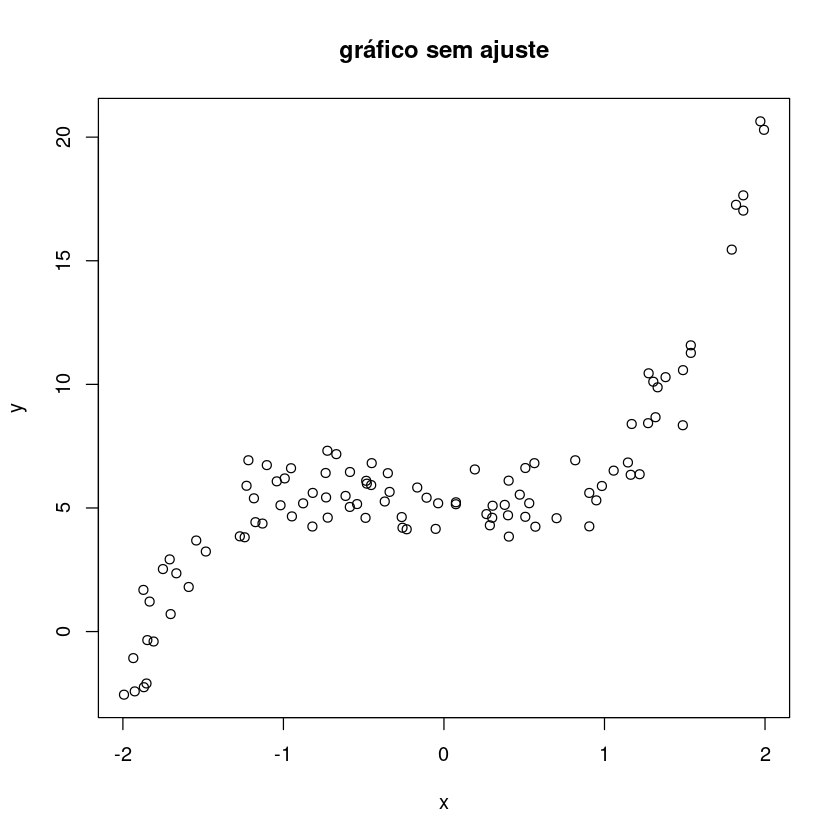

In [75]:
plot(x,y, main= 'gráfico sem ajuste')

- **Ajuste dos dados**

Agora vamos realizar o ajuste dos dados com polinômios de grau 1 até grau 7. Estes ajustes serão plotados à seguir.

In [86]:
# ajuste linear
M1 = lm(y~x)
w1 = M1$coefficients
# ajuste quadrático
M2 = lm(y~x+I(x^2))
w2 = M2$coefficients
# ajuste grau 3
M3 = lm(y~x+I(x^2)+I(x^3))
w3 = M3$coefficients
# ajuste grau 4
M4 = lm(y~x+I(x^2)+I(x^3)+I(x^4))
w4 = M4$coefficients
# ajuste grau 5
M5 = lm(y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5))
w5 = M5$coefficients
# ajuste grau 6
M6 = lm(y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6))
w6 = M6$coefficients
# ajuste grau 7
M7 = lm(y~x+I(x^2)+I(x^3)+I(x^4)+I(x^5)+I(x^6)+I(x^7))
w7 = M7$coefficients

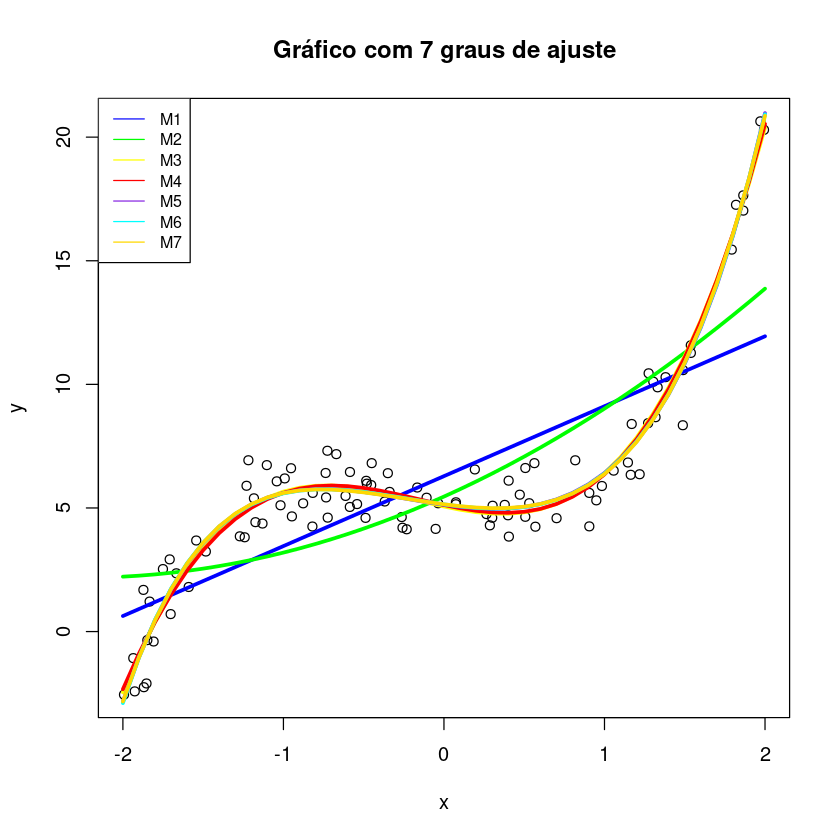

In [87]:
# vamos começar escrevendo  uma função para calcular um polinomio de coeficientes w e grau n:
f.polinomio = function(w,x){
s=w[1]
for(i in 2:length(w)){s = s+w[i]*x^(i-1)}
return(s)
}
# plotando os dados
plot(x,y, main = 'Gráfico com 7 graus de ajuste')
#plotando os modelos
xp=seq(-2,2,0.1)
y1=f.polinomio(w1,xp)
lines(xp,y1,col='blue',lwd=3)
y2=f.polinomio(w2,xp)
lines(xp,y2,col='green',lwd=3)
y3=f.polinomio(w3,xp)
lines(xp,y3,col='yellow',lwd=3)
y4=f.polinomio(w4,xp)
lines(xp,y4,col='red',lwd=3)
y5=f.polinomio(w5,xp)
lines(xp,y5,col='blueviolet',lwd=3)
y6=f.polinomio(w6,xp)
lines(xp,y6,col='cyan',lwd=3)
y7=f.polinomio(w7,xp)
lines(xp,y7,col='gold',lwd=3)

legend('topleft', legend= c("M1", "M2","M3","M4","M5","M6","M7"),col=c("blue", "green","yellow","red","blueviolet","cyan","gold"), lty=1, cex=0.8)

Como podemos perceber de forma gráfica, o dois primeiros ajustes não conseguem fazer jus a distribuição de pontos apresentada, desviando bastante do esperado. No entanto, à partir do polinômio de grau 3 temos que todos os ajustes seguintes são muito semelhantes, de forma que não contribuem, ou podem até atrapalhar devido ao overfitting, no ajuste dos pontos.

Agora vamos utilizar os métodos de AIC e BIC para verificar qual é o melhor ajuste por este método.

In [123]:
N = 100

#funcao para criar polinomios de grau x

polinomio = function(a,x){
f=a[1]
for(i in 2:length(a)){f = f+a[i]*x^(i-1)}
return(f)
}


logL = function(a){
f = 0
for(i in 1:N) f = f + (y[i]-polinomio(a,x[i]))^2
return(-f/2-N/2*log(2*pi)) 
}


In [147]:
#funcao para calcular aic e bic para cada caso

AICBIC = function(i){
    AIC = 2*i - 2*logL(w1)
    BIC = log(N)*i - 2*logL(w1)
    cat("\n", i, "AIC:",AIC, "BIC:",BIC)
    }

In [148]:
AICBIC(1)
AICBIC(2)
AICBIC(3)
AICBIC(4)
AICBIC(5)
AICBIC(6)
AICBIC(7)


 1 AIC: 850.1293 BIC: 852.7345
 2 AIC: 852.1293 BIC: 857.3397
 3 AIC: 854.1293 BIC: 861.9448
 4 AIC: 856.1293 BIC: 866.55
 5 AIC: 858.1293 BIC: 871.1552
 6 AIC: 860.1293 BIC: 875.7603
 7 AIC: 862.1293 BIC: 880.3655

 Pelos métodos de AIC e BIC temos que:
 
 - AIC: O melhor ajuste para o AIC é o de grau 3.
 
 - BIC: O melhor ajuste para o BIC é o de grau 3.